# PRCP-1014

#### Vaccinatino Prediction Description- Project

Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from time import time
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
rand_state = 10
n_iterations = 5

In [3]:
# Load the data
feature_data = pd.read_csv('../../Data/features.csv')

label_data= pd.read_csv('../../Data/labels.csv')

In [4]:
feature_data.head(5)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [5]:
feature_data.shape

(26707, 36)

In [6]:
label_data.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [7]:
label_data.shape

(26707, 3)

In [8]:
#vaccine_data=pd.merge(feature_data, label_data, on='respondent_id')

In [9]:
#vaccine_data.head()

In [10]:
#vaccine_data.shape

In [11]:
#print("Shape :",vaccine_data.shape)
#print("Rows : ",vaccine_data.shape[0])
#print("Columns : ",vaccine_data.shape[1])
#print("\nFeatures : \n" ,vaccine_data.columns.tolist())
#print("\n Missing Values : \n",vaccine_data.isnull().sum())
#print("\nUnique Values : \n" ,vaccine_data.nunique(dropna=False))

In [12]:
#vaccine_data.info()

In [13]:
#vaccine_data.describe()

In [14]:
print('\nUnique values of feature_data.h1n1_concern:: \n',feature_data.h1n1_concern.value_counts(dropna = False))
print('\nUnique values of feature_data.h1n1_knowledge:: \n',feature_data.h1n1_knowledge.value_counts(dropna = False))
print('\nUnique values of behavioral_antiviral_meds:: \n',feature_data.behavioral_antiviral_meds.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_avoidance:: \n',feature_data.behavioral_avoidance.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_face_mask:: \n',feature_data.behavioral_face_mask.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_wash_hands:: \n',feature_data.behavioral_wash_hands.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_large_gatherings:: \n',feature_data.behavioral_large_gatherings.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_outside_home:: \n',feature_data.behavioral_outside_home.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_touch_face:: \n',feature_data.behavioral_touch_face.value_counts(dropna = False))
print('\nUnique values of feature_data.doctor_recc_h1n1 :: \n',feature_data.doctor_recc_h1n1 .value_counts(dropna = False))
print('\nUnique values of feature_data.doctor_recc_seasonal :: \n',feature_data.doctor_recc_seasonal .value_counts(dropna = False))
print('\nUnique values of feature_data.chronic_med_condition :: \n',feature_data.chronic_med_condition .value_counts(dropna = False))
print('\nUnique values of feature_data.child_under_6_months:: \n',feature_data.child_under_6_months.value_counts(dropna = False))
print('\nUnique values of feature_data.health_worker:: \n',feature_data.health_worker.value_counts(dropna = False))
print('\nUnique values of feature_data.health_insurance :: \n',feature_data.health_insurance .value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_vacc_effective:: \n',feature_data.opinion_h1n1_vacc_effective.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_risk:: \n',feature_data.opinion_h1n1_risk.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_sick_from_vacc:: \n',feature_data.opinion_h1n1_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_vacc_effective:: \n',feature_data.opinion_seas_vacc_effective.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_risk:: \n',feature_data.opinion_seas_risk.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_sick_from_vacc:: \n',feature_data.opinion_seas_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of feature_data.age_group:: \n',feature_data.age_group.value_counts(dropna = False))
print('\nUnique values of feature_data.education :: \n',feature_data.education .value_counts(dropna = False))
print('\nUnique values of feature_data.race :: \n',feature_data.race .value_counts(dropna = False))
print('\nUnique values of feature_data.sex  :: \n',feature_data.sex  .value_counts(dropna = False))
print('\nUnique values of feature_data.income_poverty  :: \n',feature_data.income_poverty .value_counts(dropna = False))
print('\nUnique values of feature_data.marital_status  :: \n',feature_data.marital_status  .value_counts(dropna = False))
print('\nUnique values of feature_data.rent_or_own  :: \n',feature_data.rent_or_own  .value_counts(dropna = False))
print('\nUnique values of feature_data.employment_status  :: \n',feature_data.employment_status .value_counts(dropna = False))
print('\nUnique values of feature_data.hhs_geo_region   :: \n',feature_data.hhs_geo_region .value_counts(dropna = False))
print('\nUnique values of feature_data.census_msa   :: \n',feature_data.census_msa  .value_counts(dropna = False))
print('\nUnique values of feature_data.household_adults:: \n',feature_data.household_adults.value_counts(dropna = False))
print('\nUnique values of feature_data.household_children:: \n',feature_data.household_children.value_counts(dropna = False))
print('\nUnique values of feature_data.employment_industry:: \n',feature_data.employment_industry.value_counts(dropna = False))
print('\nUnique values of feature_data.employment_occupation :: \n',feature_data.employment_occupation .value_counts(dropna = False))
print('\nUnique values of label_data.h1n1_vaccine  :: \n',label_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of label_data.seasonal_vaccine  :: \n',label_data.seasonal_vaccine .value_counts(dropna = False))



Unique values of feature_data.h1n1_concern:: 
 2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64

Unique values of feature_data.h1n1_knowledge:: 
 1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64

Unique values of behavioral_antiviral_meds:: 
 0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64

Unique values of feature_data.behavioral_avoidance:: 
 1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64

Unique values of feature_data.behavioral_face_mask:: 
 0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64

Unique values of feature_data.behavioral_wash_hands:: 
 1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64

Unique values of feature_data.behavioral_large_gatherings:: 
 0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64

Unique values of featur

###### Grouping columns into Categorical and Continuous column list

In [15]:
# Grouping columns into Categorical and Continuous column list
Catvar_list=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance'
             ,'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings'
             ,'behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1', 'doctor_recc_seasonal'
             , 'chronic_med_condition', 'child_under_6_months', 'health_worker'#, 'health_insurance'
             , 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'
             , 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
             , 'age_group', 'education', 'race', 'sex', 'income_poverty','marital_status','rent_or_own'
             ,'employment_status','hhs_geo_region','census_msa']
Convar_list=['household_adults','household_children']


###### EDA

In [16]:
#prof = ProfileReport(feature_data)
#prof.to_file(output_file='output.html')

In [17]:
ProfileReport(feature_data)

### Data Imputation

In [18]:
feature_data_imp = feature_data.drop(columns=['respondent_id', 'health_insurance', 'employment_industry', 'employment_occupation'], axis=1)

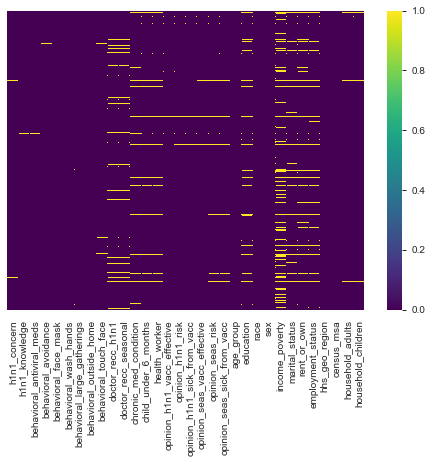

In [19]:
sns.set_style('whitegrid')
sns.heatmap(feature_data_imp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [20]:
#num_cols = feature_data_imp.select_dtypes([np.number]).columns
#non_num_cols = feature_data_imp.select_dtypes(exclude = [np.number]).columns
feature_data_imp[Convar_list] = feature_data_imp[Convar_list].fillna(feature_data_imp[Convar_list].mean())
feature_data_imp[Catvar_list] = feature_data_imp[Catvar_list].fillna(feature_data_imp[Catvar_list].mode().iloc[0])

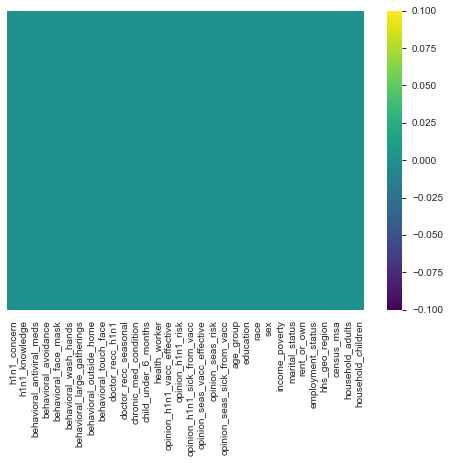

In [21]:
sns.set_style('whitegrid')
sns.heatmap(feature_data_imp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### Encoding Categorical Variables

In [22]:
labelencoder = LabelEncoder()

In [23]:
feature_data_enc = feature_data_imp

In [24]:
objList = feature_data_enc.select_dtypes(include = "object").columns
objList

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [25]:
Feature_Code_Value = pd.DataFrame(columns=['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt'])

In [26]:
for feat in objList:
    feat_col_name = feat+'_enc'
    feature_data_enc[feat_col_name] = labelencoder.fit_transform(feature_data_enc[feat].astype(str))
    feat_temp_val = feature_data_enc.groupby([feat, feat_col_name]).size().reset_index().rename(columns={0:'Feature_Value_Cnt'})
    feat_temp_val['Feature_Type'] = feat
    #feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']]
    Feature_Code_Value = Feature_Code_Value[['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt']].append(feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']])
    Feature_Code_Value.Feature_Value.fillna(Feature_Code_Value[feat], inplace=True)
    Feature_Code_Value.Feature_Value_Enc.fillna(Feature_Code_Value[feat_col_name], inplace=True)
    Feature_Code_Value.drop(columns=[feat, feat_col_name], axis=1, inplace=True)
    del feat_temp_val
    feature_data_enc.drop(columns=[feat], axis=1, inplace=True)
    
Feature_Code_Value.reset_index(drop=True, inplace=True)
Feature_Code_Value['Feature_Value_Enc'] = Feature_Code_Value['Feature_Value_Enc'].astype(int)

In [27]:
Feature_Code_Value

Feature_Type              Feature_Value  Feature_Value_Enc  \
0           age_group              18 - 34 Years                  0   
1           age_group              35 - 44 Years                  1   
2           age_group              45 - 54 Years                  2   
3           age_group              55 - 64 Years                  3   
4           age_group                  65+ Years                  4   
5           education                   12 Years                  0   
6           education                 < 12 Years                  1   
7           education           College Graduate                  2   
8           education               Some College                  3   
9                race                      Black                  0   
10               race                   Hispanic                  1   
11               race          Other or Multiple                  2   
12               race                      White                  3   
13                sex                     Female                  0   
14                sex                       Male                  1   
15     income_poverty  <= $75,000, Above Poverty                  0   
16     income_poverty                  > $75,000                  1   
17     income_poverty              Below Poverty                  2   
18     marital_status                    Married                  0   
19     marital_status                Not Married                  1   
20        rent_or_own                        Own                  0   
21        rent_or_own                       Rent                  1   
22  employment_status                   Employed                  0   
23  employment_status         Not in Labor Force                  1   
24  employment_status                 Unemployed                  2   
25     hhs_geo_region                   atmpeygn                  0   
26     hhs_geo_region                   bhuqouqj                  1   
27     hhs_geo_region                   dqpwygqj                  2   
28     hhs_geo_region                   fpwskwrf                  3   
29     hhs_geo_region                   kbazzjca                  4   
30     hhs_geo_region                   lrircsnp                  5   
31     hhs_geo_region                   lzgpxyit                  6   
32     hhs_geo_region                   mlyzmhmf                  7   
33     hhs_geo_region                   oxchjgsf                  8   
34     hhs_geo_region                   qufhixun                  9   
35         census_msa   MSA, Not Principle  City                  0   
36         census_msa        MSA, Principle City                  1   
37         census_msa                    Non-MSA                  2   

   Feature_Value_Cnt  
0               5215  
1               3848  
2               5238  
3               5563  
4               6843  
5               5797  
6               2363  
7              11504  
8               7043  
9               2118  
10              1755  
11              1612  
12             21222  
13             15858  
14             10849  
15             17200  
16              6810  
17              2697  
18             14963  
19             11744  
20             20778  
21              5929  
22             15023  
23             10231  
24              1453  
25              2033  
26              2846  
27              1126  
28              3265  
29              2858  
30              2078  
31              4297  
32              2243  
33              2859  
34              3102  
35             11645  
36              7864  
37              7198

In [28]:
feature_data_enc

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  age_group_enc  \
0                        1.0               0.0  ...              3   
1                        1.0               0.0  ...              1   
2                        0.0               0.0  ...              0   
3                        0.0               0.0  ...              4   
4                        1.0               0.0  ...              2   
...                      ...               ...  ...            ...   
26702                    0.0               0.0  ...              4   
26703                    0.0               1.0  ...              0   
26704                    1.0               0.0  ...              3   
26705                    1.0               0.0  ...              0   
26706                    0.0               0.0  ...              4   

       education_enc  race_enc  sex_enc  income_poverty_enc  \
0                  1         3        0                   2   
1                  0         3        1                   2   
2                  2         3        1                   0   
3                  0         3        0                   2   
4                  3         3        0                   0   
...              ...       ...      ...                 ...   
26702              3         3        0                   0   
26703              2         3        1                   0   
26704              3         3        0                   0   
26705              3         1        0                   0   
26706     

##### Define X and Y

Since this is multi-label classification, we will start by defining X and Y.

In [29]:
X = feature_data_enc
Y = label_data.drop(columns=['respondent_id'], axis=1)

In [30]:
Y.head()

h1n1_vaccine  seasonal_vaccine
0             0                 0
1             0                 1
2             0                 0
3             0                 1
4             0                 0

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=rand_state)

In [32]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

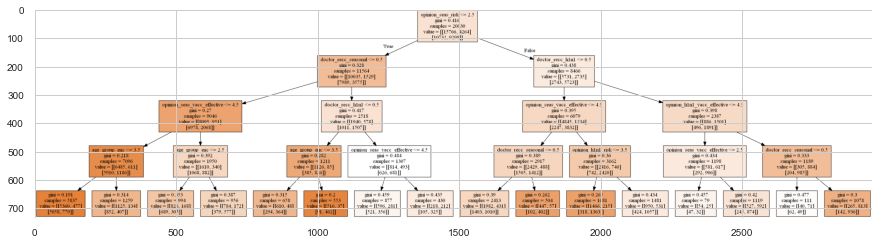

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                #class_names=['no', 'yes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
graph.render("DT")

plt.figure(figsize=(15,15))

img = mpimg.imread('DT.png')
imgplot = plt.imshow(img)
plt.show()

#### Scaling the dataset

In [34]:
scaler = MinMaxScaler()

In [35]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [36]:
X_scaled.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26707.000000    26707.000000               26707.000000   
mean       0.539933        0.630696                   0.048714   
std        0.303005        0.308523                   0.215273   
min        0.000000        0.000000                   0.000000   
25%        0.333333        0.500000                   0.000000   
50%        0.666667        0.500000                   0.000000   
75%        0.666667        1.000000                   0.000000   
max        1.000000        1.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26707.000000          26707.000000           26707.000000   
mean               0.727749              0.068933               0.825888   
std                0.445127              0.253345               0.379213   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26707.000000             26707.000000   
mean                      0.357472                 0.336279   
std                       0.479264                 0.472444   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  age_group_enc  \
count           26707.000000      26707.000000  ...   26707.000000   
mean                0.678811          0.202494  ...       0.546533   
std                 0.466942          0.401866  ...       0.364330   
min                 0.000000          0.000000  ...       0.000000   
25%                 0.000000          0.000000  ...       0.250000   
50%                 1.000000          0.000000  ...       0.500000   
75%                 1.000000          0.000000  ...       1.000000   
max                 1.000000          1.000000  ...       1.000000   

       education_enc      race_enc       sex_enc  income_poverty_enc  \
count   26707.000000  26707.000000  26707.000000        26707.000000   
mean        0.580372      0.856767      0.406223            0.228479   
std         0.357996      0.307742      0.491136            0.335460   
min         0.000000      0.000000      0.000000            0.000000   
25%         0.333333      1.000000      0.000000            0.000000   
50%         0.666667      1.000000      0.000000            0.000000   
75%         1.000000      1.000000      1.000000            0.500000   
max         1.000000      1.000000      1.000000            1.000000   

       marital_status_enc  rent_or_own_enc  employment_status_enc  \
count        26707.000000     26707.000000           26707.000000   
mean             0.439735         0.222002               0.245947   
std              0.496364         0.415600               0.299482   
min              0.000000         0.000000               0.000000   
25%              0.000000         0.000000               0.000000   
50%              0.000000         0.000000               0.000000   
75%              1.000000         0.000000               0.500000   
max              1.000000         1.000000               1.000000   

       hhs_geo_region_enc  census_msa_enc  
count        26707.000000    26707.000000  
mean             0.536638        0.416745  
std              0.311776        0.411657  
min              0.000000        0.000000  
25%              0.333333        0.00

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=rand_state)

### Correlation Matrix

In [38]:
corr = X_scaled.corr()

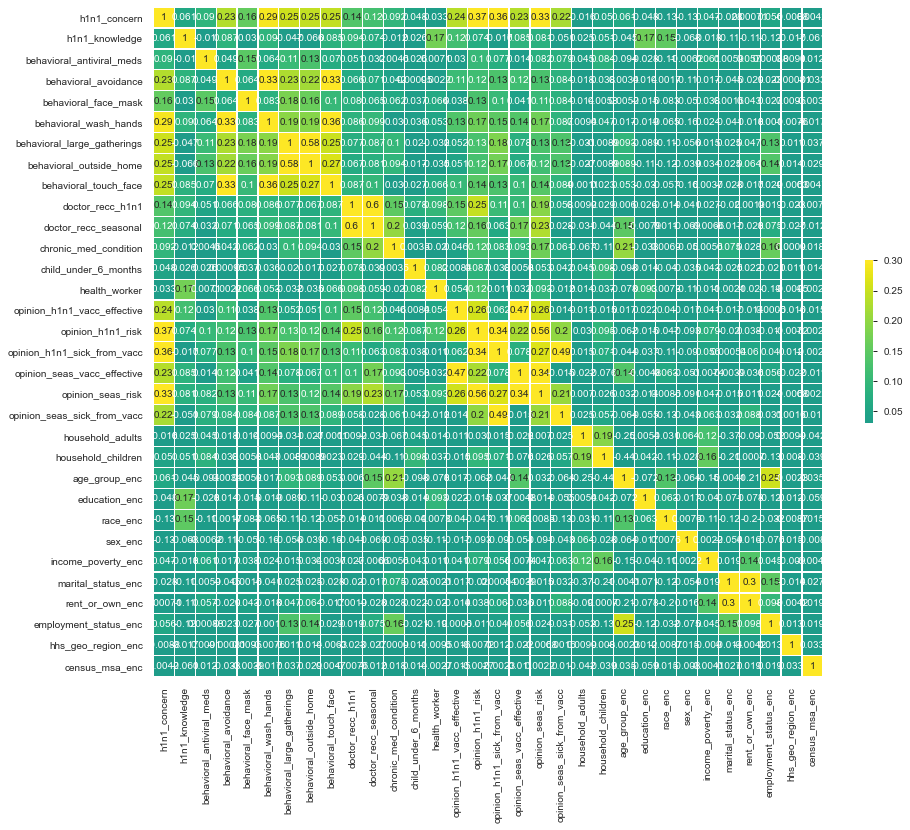

In [39]:
# Checking for Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='viridis', vmax=.3 ,vmin=.03 ,center=0,square=True, linewidths=.2, 
            cbar_kws={"shrink": .2}, annot=True)

In [40]:
kot = corr[(corr>=.8) & (corr<1)]
kot.dropna(axis=0, how='all', inplace = True)
kot.dropna(axis=1, how='all', inplace = True)
plt.figure(figsize=(12,8))
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', linewidths=3, linecolor='black')

kot
#matrix = np.triu(kot)
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', mask = matrix)

Empty DataFrame
Columns: []
Index: []

<Figure size 864x576 with 0 Axes>

### Set Baseline of the metrics


In [41]:
cv = KFold(n_splits=n_iterations, random_state=rand_state)

In [42]:
results_df = pd.DataFrame(columns=['Classifier', 'Features', 'Accuracy', 'Parameters', 'Recall', 
                                   'Precision', 'FPR', 'TPR', 'AUC', 'True_Positives', 
                                   'True_Negatives', 'False_Positives', 'False_Negatives'])
results_df

Empty DataFrame
Columns: [Classifier, Features, Accuracy, Parameters, Recall, Precision, FPR, TPR, AUC, True_Positives, True_Negatives, False_Positives, False_Negatives]
Index: []

In [43]:
def confusion_mat(y_test, y_pred):
    print('Confusion Matrix::\n')
    #print(pd.crosstab(y_test, y_pred))
    print()
    print('Classification Report::')
    print(classification_report(y_test, y_pred))
    #TN = pd.crosstab(y_test, y_pred).iloc[0, 0]
    #FP = pd.crosstab(y_test, y_pred).iloc[0, 1]
    #FN = pd.crosstab(y_test, y_pred).iloc[1, 0]
    #TP = pd.crosstab(y_test, y_pred).iloc[1, 1]
    #Cost = (FP*10)+(FN*500)
    Recall = recall_score(y_test, y_pred,average='weighted')
    Precision = precision_score(y_test, y_pred,average='weighted')
    Accuracy = accuracy_score(y_test, y_pred)
    return(Accuracy, Recall, Precision)

In [44]:
clfsDict = {'Tree - Decision Tree': DecisionTreeClassifier(random_state=rand_state),
            'Tree - Extra Trees': ExtraTreeClassifier(random_state=rand_state),
            'Ensemble - Extra Trees': ExtraTreesClassifier(random_state=rand_state),
            #'Neighbors - KNN': KNeighborsClassifier(),
            #'Neighbors - Radius': RadiusNeighborsClassifier(),
            'Neural - MLP': MLPClassifier(random_state=rand_state),
            'Ensemble - Random Forest': RandomForestClassifier(random_state=rand_state)}

In [45]:
for mdl, clf in clfsDict.items():
    acc = cross_val_score(clf,X_train,y=Y_train,cv=cv)
    clf.fit(X_train, Y_train)
    y_pred_full_data = clf.predict(X_test)
    y_pred_proba_full_data = clf.predict_proba(X_test)
    #fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba_full_data)
    auc = roc_auc_score(Y_test, y_pred_full_data)
    (Accuracy, Recall, Precision) = confusion_mat(Y_test, y_pred_full_data)
    results_df = results_df.append({'Classifier':mdl
                                    , 'Features':'Full'
                                    , 'Parameters': 'Default'
                                    , 'Accuracy': Accuracy
                                    , 'Recall': Recall
                                    , 'Precision': Precision
                                    #, 'FPR': fpr
                                    #, 'TPR': tpr
                                    , 'AUC': auc
                                   }
                                   , ignore_index=True
                                  )
    print()
    print()

Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      1410
           1       0.65      0.67      0.66      3137

   micro avg       0.57      0.60      0.59      4547
   macro avg       0.53      0.56      0.54      4547
weighted avg       0.57      0.60      0.59      4547
 samples avg       0.31      0.31      0.30      4547



Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.40      0.42      0.41      1410
           1       0.64      0.64      0.64      3137

   micro avg       0.57      0.58      0.57      4547
   macro avg       0.52      0.53      0.53      4547
weighted avg       0.57      0.58      0.57      4547
 samples avg       0.29      0.29      0.28      4547



Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.68      0.40      0.50 

In [46]:
results_df

Classifier Features  Accuracy Parameters    Recall  \
0      Tree - Decision Tree     Full  0.533323    Default  0.602815   
1        Tree - Extra Trees     Full  0.525386    Default  0.575764   
2    Ensemble - Extra Trees     Full  0.655234    Default  0.637343   
3              Neural - MLP     Full  0.647446    Default  0.649219   
4  Ensemble - Random Forest     Full  0.658829    Default  0.639103   

   Precision  FPR  TPR       AUC  True_Positives  True_Negatives  \
0   0.573605  NaN  NaN  0.655994             NaN             NaN   
1   0.568417  NaN  NaN  0.645500             NaN             NaN   
2   0.731220  NaN  NaN  0.719345             NaN             NaN   
3   0.711406  NaN  NaN  0.725609             NaN             NaN   
4   0.739423  NaN  NaN  0.721434             NaN             NaN   

   False_Positives  False_Negatives  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3              NaN              NaN  
4              NaN              NaN

# Feature Reduction (RFECV)


In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=rand_state)
selector = RFECV(estimator=clf, step = 4, cv=3, scoring='accuracy')

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 9150 to 17673
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 20030 non-null  float64
 1   h1n1_knowledge               20030 non-null  float64
 2   behavioral_antiviral_meds    20030 non-null  float64
 3   behavioral_avoidance         20030 non-null  float64
 4   behavioral_face_mask         20030 non-null  float64
 5   behavioral_wash_hands        20030 non-null  float64
 6   behavioral_large_gatherings  20030 non-null  float64
 7   behavioral_outside_home      20030 non-null  float64
 8   behavioral_touch_face        20030 non-null  float64
 9   doctor_recc_h1n1             20030 non-null  float64
 10  doctor_recc_seasonal         20030 non-null  float64
 11  chronic_med_condition        20030 non-null  float64
 12  child_under_6_months         20030 non-null  float64
 13  health_worker

In [49]:
#%%time

feature_fit = selector.fit(X_train, Y_train.iloc[:, 0])

print('The number of selected features with CV:: ', feature_fit.n_features_)
print('Selected Features:: ', X_train.columns[selector.support_])

The number of selected features with CV::  28
Selected Features::  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',
       'age_group_enc', 'education_enc', 'race_enc', 'sex_enc',
       'income_poverty_enc', 'marital_status_enc', 'rent_or_own_enc',
       'employment_status_enc', 'hhs_geo_region_enc', 'census_msa_enc'],
      dtype='object')


In [50]:
feature_fit = selector.fit(X_train, Y_train.iloc[:, 1])

print('The number of selected features with CV:: ', feature_fit.n_features_)
print('Selected Features:: ', X_train.columns[selector.support_])

The number of selected features with CV::  28
Selected Features::  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',
       'age_group_enc', 'education_enc', 'race_enc', 'sex_enc',
       'income_poverty_enc', 'marital_status_enc', 'rent_or_own_enc',
       'employment_status_enc', 'hhs_geo_region_enc', 'census_msa_enc'],
      dtype='object')


#### behavioral_antiviral_meds, behavioral_face_mask, behavioral_wash_hands 

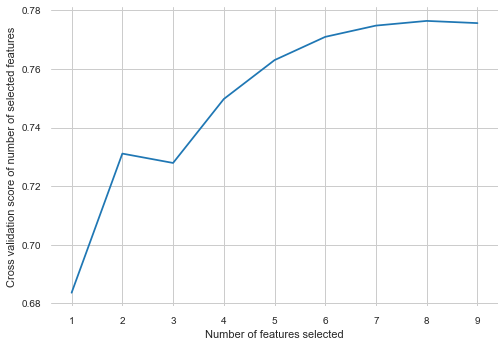

In [51]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [52]:
selector.grid_scores_

array([0.6836248 , 0.73110354, 0.72790789, 0.7497251 , 0.76300529,
       0.77094345, 0.77478777, 0.77638527, 0.77563636])

In [53]:
X_train_reduced_features = X_train[X_train.columns[selector.support_]]
X_test_reduced_features = X_test[X_test.columns[selector.support_]]

In [54]:
X_train_reduced_features.head(2)

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
9150      1.000000             0.5                   1.0   
670       0.666667             0.5                   1.0   

      behavioral_large_gatherings  behavioral_outside_home  \
9150                          0.0                      0.0   
670                           1.0                      1.0   

      behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
9150                    0.0               1.0                   1.0   
670                     1.0               0.0                   0.0   

      chronic_med_condition  health_worker  ...  age_group_enc  education_enc  \
9150                    1.0            0.0  ...            1.0       0.333333   
670                     1.0            0.0  ...            1.0       1.000000   

      race_enc  sex_enc  income_poverty_enc  marital_status_enc  \
9150       1.0      0.0                 0.0                 0.0   
670        1.0      1.0                 0.0                 0.0   

      rent_or_own_enc  employment_status_enc  hhs_geo_region_enc  \
9150              0.0                    0.5            0.111111   
670               1.0                    0.5            0.666667   

      census_msa_enc  
9150             0.0  
670              0.0  

[2 rows x 28 columns]

In [55]:
X_test_reduced_features.head(2)

h1n1_concern  h1n1_knowledge  behavioral_avoidance  \
2653      1.000000             1.0                   1.0   
9506      0.666667             1.0                   1.0   

      behavioral_large_gatherings  behavioral_outside_home  \
2653                          0.0                      0.0   
9506                          1.0                      0.0   

      behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
2653                    1.0               0.0                   1.0   
9506                    1.0               0.0                   0.0   

      chronic_med_condition  health_worker  ...  age_group_enc  education_enc  \
2653                    1.0            0.0  ...           1.00       0.333333   
9506                    0.0            0.0  ...           0.75       0.666667   

      race_enc  sex_enc  income_poverty_enc  marital_status_enc  \
2653       1.0      0.0                 0.0                 1.0   
9506       1.0      0.0                 0.0                 1.0   

      rent_or_own_enc  employment_status_enc  hhs_geo_region_enc  \
2653              0.0                    0.5            0.666667   
9506              0.0                    0.0            0.888889   

      census_msa_enc  
2653             0.0  
9506             0.0  

[2 rows x 28 columns]

In [56]:
clfsDict = {#'Tree - Decision Tree': DecisionTreeClassifier(random_state=rand_state),
            #'Tree - Extra Trees': ExtraTreeClassifier(random_state=rand_state),
            'Ensemble - Extra Trees': ExtraTreesClassifier(random_state=rand_state),
            #'Neighbors - KNN': KNeighborsClassifier(),
            #'Neighbors - Radius': RadiusNeighborsClassifier(),
            'Neural - MLP': MLPClassifier(random_state=rand_state),
            'Ensemble - Random Forest': RandomForestClassifier(random_state=rand_state)}

In [57]:
for mdl, clf in clfsDict.items():
    acc = cross_val_score(clf,X_train_reduced_features,y=Y_train,cv=cv)
    clf.fit(X_train_reduced_features, Y_train)
    y_pred_full_data = clf.predict(X_test_reduced_features)
    y_pred_proba_full_data = clf.predict_proba(X_test_reduced_features)
    #fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba_full_data)
    auc = roc_auc_score(Y_test, y_pred_full_data)
    (Accuracy, Recall, Precision) = confusion_mat(Y_test, y_pred_full_data)
    results_df = results_df.append({'Classifier':mdl
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Default'
                                    , 'Accuracy': Accuracy
                                    , 'Recall': Recall
                                    , 'Precision': Precision
                                    #, 'FPR': fpr
                                    #, 'TPR': tpr
                                    , 'AUC': auc
                                   }
                                   , ignore_index=True
                                  )
    print()
    print()

Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.68      0.42      0.51      1410
           1       0.75      0.73      0.74      3137

   micro avg       0.74      0.64      0.68      4547
   macro avg       0.72      0.57      0.63      4547
weighted avg       0.73      0.64      0.67      4547
 samples avg       0.34      0.32      0.32      4547



Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      1410
           1       0.75      0.74      0.75      3137

   micro avg       0.72      0.66      0.69      4547
   macro avg       0.69      0.62      0.65      4547
weighted avg       0.71      0.66      0.69      4547
 samples avg       0.34      0.33      0.33      4547



Confusion Matrix::


Classification Report::
              precision    recall  f1-score   support

           0       0.69      0.41      0.51 

In [58]:
results_df.sort_values(by='AUC', ascending=True)

Classifier Features  Accuracy Parameters    Recall  \
1        Tree - Extra Trees     Full  0.525386    Default  0.575764   
0      Tree - Decision Tree     Full  0.533323    Default  0.602815   
2    Ensemble - Extra Trees     Full  0.655234    Default  0.637343   
5    Ensemble - Extra Trees  Reduced  0.654486    Default  0.635144   
4  Ensemble - Random Forest     Full  0.658829    Default  0.639103   
7  Ensemble - Random Forest  Reduced  0.656882    Default  0.641302   
3              Neural - MLP     Full  0.647446    Default  0.649219   
6              Neural - MLP  Reduced  0.652688    Default  0.661315   

   Precision  FPR  TPR       AUC  True_Positives  True_Negatives  \
1   0.568417  NaN  NaN  0.645500             NaN             NaN   
0   0.573605  NaN  NaN  0.655994             NaN             NaN   
2   0.731220  NaN  NaN  0.719345             NaN             NaN   
5   0.730030  NaN  NaN  0.721029             NaN             NaN   
4   0.739423  NaN  NaN  0.721434             NaN             NaN   
7   0.736077  NaN  NaN  0.722517             NaN             NaN   
3   0.711406  NaN  NaN  0.725609             NaN             NaN   
6   0.713455  NaN  NaN  0.734443             NaN             NaN   

   False_Positives  False_Negatives  
1              NaN              NaN  
0              NaN              NaN  
2              NaN              NaN  
5              NaN              NaN  
4              NaN              NaN  
7              NaN              NaN  
3              NaN              NaN  
6              NaN              NaN